
<a href="https://colab.research.google.com/github/Argentan/DMA_LAB2/blob/master/tutoriales/03_manejo_de_datos-pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pandas - Continuación

## Combinando Data Frames

In [1]:
import numpy as np
import pandas as pd

### Append

In [2]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [3]:
Nombres2 = pd.DataFrame({'id':[5,6], 'Nombre': ["Julia", "Alberto"]})
Nombres2

,id,Nombre
0,5,Julia
1,6,Alberto


In [4]:
Nombres.append(Nombres2)

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro
0,5,Julia
1,6,Alberto


### Merge

#### Por una columna

In [5]:
Nombres = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres

,id,Nombre
0,1,Ana
1,2,Juan
2,3,Carolina
3,4,Pedro


In [6]:
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})
Edad

,id,Edad
0,1,11
1,2,21
2,3,8
3,4,15


In [7]:
pd.merge(Nombres, Edad)

,id,Nombre,Edad
0,1,Ana,11
1,2,Juan,21
2,3,Carolina,8
3,4,Pedro,15


#### Especificando columna comun

In [8]:
Nombres = pd.DataFrame({'id_Nombres':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id_edades':[1,2,3,4], 'Edad':[11,21,8,15]})

In [9]:
pd.merge(Nombres, Edad, left_on='id_Nombres', right_on='id_edades')

,id_Nombres,Nombre,id_edades,Edad
0,1,Ana,1,11
1,2,Juan,2,21
2,3,Carolina,3,8
3,4,Pedro,4,15


### How (inner, outer, left, right,...)

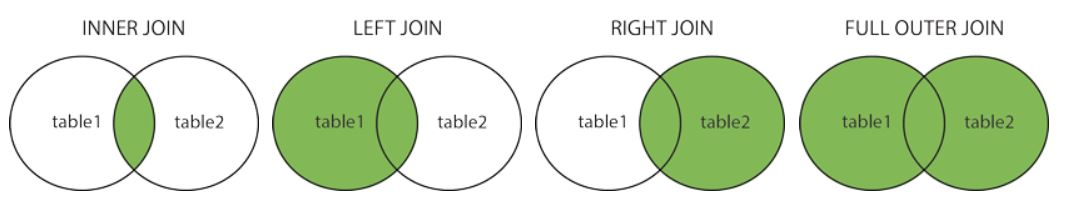

In [10]:
Nombres = pd.DataFrame({'id':[3,4,5,6], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Edad = pd.DataFrame({'id':[1,2,3,4], 'Edad':[11,21,8,15]})

In [ ]:
pd.merge(Nombres, Edad, how='inner')

In [ ]:
pd.merge(Nombres, Edad, how='outer')

In [ ]:
pd.merge(Nombres, Edad, how='left')

In [ ]:
pd.merge(Nombres, Edad, how='right')

## Agrupaciones



In [11]:
data = pd.read_csv("../data/titanic.csv", index_col="PassengerId")

In [27]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumFam
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Puedo usar un agrupador por Columna

In [25]:
data['Survived'].sum()

342

In [28]:
data['Age'].mean()

29.69911764705882

Y también puedo agrupar por fila, por ejemplo, para construir otra columna

In [ ]:
data['NumFam'] = data[['SibSp', 'Parch']].sum(axis=1)
data[['SibSp', 'Parch','NumFam']].head(10)


### Group By

Las agrupaciones sirven para hacer cálculos sobre subconjuntos de los datos, generalmente tienen tres partes:

1. Definir los grupos
2. Aplicar un cálculo
3. Combinar los resultados

In [23]:
agrupado = data.groupby(["Pclass", "Sex"])
agrupado

In [24]:
agrupado.Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [31]:
agrupado.Survived.agg(
    media="mean",
    media_2= np.mean,
    varianza= "var",
    cantidad= "count",
    cant2= len
)

media   media_2  varianza  cantidad  cant2
Pclass Sex                                                  
1      female  0.968085  0.968085  0.031229        94     94
       male    0.368852  0.368852  0.234724       122    122
2      female  0.921053  0.921053  0.073684        76     76
       male    0.157407  0.157407  0.133870       108    108
3      female  0.500000  0.500000  0.251748       144    144
       male    0.135447  0.135447  0.117439       347    347

In [ ]:
data.groupby("Survived")[['Age', 'SibSp', 'Parch', 'NumFam', 'Fare']].mean()

,Age,SibSp,Parch,NumFam,Fare
Survived,,,,,
0,30.626179,0.553734,0.329690,0.883424,22.117887
1,28.343690,0.473684,0.464912,0.938596,48.395408


### Tablas de contingencia

Las tablas de contingencia asemejan las tablas dinámicas de excel, sirven apra ver inteacciones entre variables



In [34]:
pd.crosstab(data.Age.isnull(), data.Survived)

Survived,0,1
Age,,
False,424,290
True,125,52


In [38]:
pd.crosstab(data.Age.isnull(), data.Survived).apply(lambda x: x/x.sum(), axis=0)

Survived,0,1
Age,,
False,0.772313,0.847953
True,0.227687,0.152047


In [ ]:
pd.crosstab(data.Pclass, data.Survived, values=data.Fare, aggfunc=np.mean)

Survived,0,1
Pclass,,
1,64.684008,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


In [ ]:
pd.crosstab(pd.qcut(data.Age, 10), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Age,,
"(0.419, 14.0]",0.631579,0.538462
"(14.0, 19.0]",0.783784,0.100000
"(19.0, 22.0]",0.666667,0.108696
"(22.0, 25.0]",0.769231,0.136364
"(25.0, 28.0]",0.722222,0.255814
"(28.0, 31.8]",0.730769,0.175000
"(31.8, 36.0]",0.965517,0.258065
"(36.0, 41.0]",0.681818,0.129032
"(41.0, 50.0]",0.703704,0.235294


In [ ]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean)

Sex,female,male
Age,,
"(0, 10]",0.612903,0.575758
"(10, 20]",0.739130,0.144928
"(20, 30]",0.753086,0.154362
"(30, 40]",0.836364,0.230000
"(40, 50]",0.677419,0.218182
"(50, 60]",0.928571,0.142857
"(60, 70]",1.000000,0.071429
"(70, 80]",NaN,0.200000


## Graficación Simple con plot()

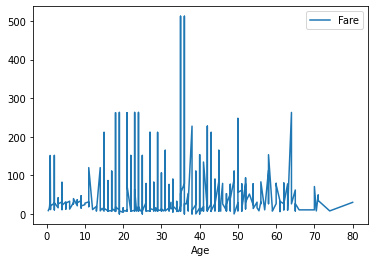

In [58]:
data.sort_values('Age').plot(x = 'Age', y = 'Fare')

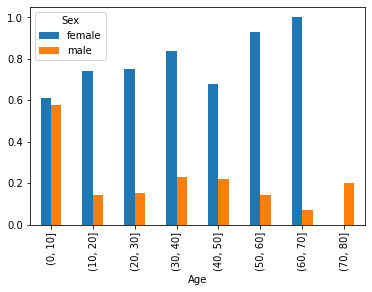

In [45]:
pd.crosstab(pd.cut(data.Age, range(0, 100, 10)), data.Sex, values=data.Survived, aggfunc=np.mean).plot(kind = 'bar')

## Ejercicios

### Combinación de Objetos

Crear los siguientes objetos:

In [ ]:
Nombres_1 = pd.DataFrame({'id':[1,2,3,4], 'Nombre': ["Ana", "Juan", "Carolina", "Pedro"]})
Nombres_2 = pd.DataFrame({'id':[5,6,7,8], 'Nombre': ["Martin", "Lucas", "Julieta", "Pablo"]})
Edad_1 = pd.DataFrame({'id_edades':[3,4,5,6], 'Edad':[11,21,8,15]})

Concatenar los objetos Nombres_1 y Nombres_2 en un objeto llamado Nombres_3

Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con las filas que coincidan

Hacer un Merge de Nombre_3 y Edad_1, quedandonos solo con todas las filas de Nombre_3

### Agrupaciones

¿Cuál es el precio promedio que se pagó por un Ticket? (Fare)


¿Cuál es el precio promedio que se pagó en cada Categoría? (Pclass) 

Construir una Tabla de Contingencia usando Genero (Sex) y Categoría (Pclass) para calcular el porcentaje de supervivencia

Construir una Tabla de Contingencia usando el Genero y el precio de un Ticket en 5 rangos para calcular el porcentaje de supervivencia

Graficar el porcentaje de supervivencia por Categoría y Género